In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate

In [2]:
itplt = [[0, 0.003, 0.01],
 [5, 0.003, 0.01],
 [6, 0.02, 0.04],
 [9, 0.02, 0.04],
 [10, 0.03, 0.05],
 [14, 0.03, 0.05],
 [15, 0.02, 0.04],
 [19, 0.02, 0.04],
 [20, 0.003, 0.01],
 [24, 0.003, 0.01]]

itplt_arr = np.array(itplt)

In [3]:
def __get_itplt_value(vmin, vmax):
    _vmin = np.max(itplt_arr[itplt_arr[:,0] <= float(vmin)][:,0])
    _vmax = np.min(itplt_arr[itplt_arr[:,0] >= float(vmax)][:,0])
    vals = itplt_arr[(itplt_arr[:,0] >= _vmin) & (itplt_arr[:,0] <= _vmax)][:,1:3]
    return (np.array([_vmin, _vmax]), np.squeeze(vals[:1,]), np.squeeze(vals[-1:,]))

def get_itplt_value(hour):
    return __get_itplt_value(hour, hour + 1)

# example
get_itplt_value(9), __get_itplt_value(0, 7)

((array([ 9., 10.]), array([0.02, 0.04]), array([0.03, 0.05])),
 (array([0., 9.]), array([0.003, 0.01 ]), array([0.02, 0.04])))

In [4]:
def time_random_lineal_interp(val, thds):
    x_thds, y_thds_min, y_thds_max = thds
    x = np.array([x_thds[0], x_thds[1]])
    y1 = np.random.uniform(y_thds_min[0], y_thds_min[1])
    y2 = np.random.uniform(y_thds_max[0], y_thds_max[1])
    y = np.array([y1, y2])
    f = interpolate.interp1d(x, y)
    return f(val)

#examples
time_random_lineal_interp(.25, ([0, 1], [20, 30], [25, 35])), time_random_lineal_interp(.25, ([0, 1], [20, 30], [25, 35]))

(array(27.42511166), array(28.78495881))

In [5]:
rng = pd.date_range('2018-01-01T00:00Z', '2018-01-27T23:59Z', freq='15T')

In [6]:
max(rng), min(rng), len(rng)

(Timestamp('2018-01-27 23:45:00+0000', tz='UTC', freq='15T'),
 Timestamp('2018-01-01 00:00:00+0000', tz='UTC', freq='15T'),
 2592)

In [7]:
df = pd.DataFrame({'time': rng})

In [8]:
df.head()

,time
0,2018-01-01 00:00:00+00:00
1,2018-01-01 00:15:00+00:00
2,2018-01-01 00:30:00+00:00
3,2018-01-01 00:45:00+00:00
4,2018-01-01 01:00:00+00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 1 columns):
time    2592 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 20.3 KB


In [10]:
df['hour'] = df.time.dt.hour
df['val_to_itpl'] = df['hour'] + (df.time.dt.minute) / 60.0

In [11]:
%timeit df['itplt'] = df.hour.map(get_itplt_value)

70.3 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit df['val_01'] = df.apply(lambda x: time_random_lineal_interp(x['val_to_itpl'], x['itplt']), axis=1)

415 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
df.head(20)

,time,hour,val_to_itpl,itplt,val_01
0,2018-01-01 00:00:00+00:00,0,0.00,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.00845798517978882
1,2018-01-01 00:15:00+00:00,0,0.25,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.006093208477049049
2,2018-01-01 00:30:00+00:00,0,0.50,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.004730036130632735
3,2018-01-01 00:45:00+00:00,0,0.75,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.00693894983360253
4,2018-01-01 01:00:00+00:00,1,1.00,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.00960276781835084
5,2018-01-01 01:15:00+00:00,1,1.25,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.008910629808434182
6,2018-01-01 01:30:00+00:00,1,1.50,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.006011334292495391
7,2018-01-01 01:45:00+00:00,1,1.75,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.005485783292518972
8,2018-01-01 02:00:00+00:00,2,2.00,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.009534129527790713
9,2018-01-01 02:15:00+00:00,2,2.25,"([0.0, 5.0], [0.003, 0.01], [0.003, 0.01])",0.0064960921361949964


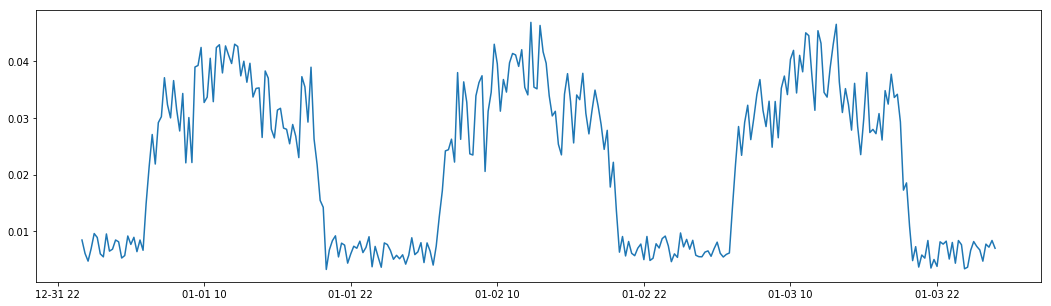

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,5))

size = 300

plt.plot(df.time[:size,], df.val_01[:size,])